In [2]:
import torch
from performer_pytorch import PerformerLM
import scanpy as sc
import anndata as ad
import numpy as np

In [4]:
#load batches
batch_0 = np.load('data/embeddings_0.npy')
print(batch_0.shape)
batch_1 = np.load('data/embeddings_1.npy')
print(batch_1.shape)
# batch_2 = np.load('data/embeddings_2.npy')
# print(batch_2.shape)

(3676, 2455, 200)
(3676, 2455, 200)


In [5]:
#glue batches together
EMBEDING_DIM = 2455*200
embeddings = np.concatenate([batch_0, batch_1], axis=0)
#reshape array
embeddings = embeddings.reshape([embeddings.shape[0], EMBEDING_DIM])
embeddings.shape

(7352, 491000)

In [17]:
# Transform into an AnnData object
i = 2000

data_path = 'data/adata_preprocessed_4000.h5ad'
adata = sc.read_h5ad(data_path)

aembed = sc.AnnData(embeddings[:i])
aembed.obs = adata[:i].obs
aembed.obs_names = adata[:i].obs_names
aembed.uns = adata[:i].uns
aembed

c:\Users\arthe\anaconda3\envs\scbert_new\lib\site-packages\anndata\_core\anndata.py:796: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  getattr(self, attr).index = value
c:\Users\arthe\anaconda3\envs\scbert_new\lib\site-packages\anndata\_core\anndata.py:796: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  getattr(self, attr).index = value


AnnData object with n_obs × n_vars = 2000 × 491000
    obs: 'cell1', 'cell2', 'fraction', 'sample', 'cell_ID', 'n_genes', 'leiden'
    uns: 'log1p'

In [18]:
#UMAP dimentionality reduction
sc.pp.neighbors(aembed)
sc.tl.umap(aembed)
aembed

c:\Users\arthe\anaconda3\envs\scbert_new\lib\site-packages\scanpy\tools\_utils.py:41: UserWarning: You’re trying to run this on 491000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


AnnData object with n_obs × n_vars = 2000 × 491000
    obs: 'cell1', 'cell2', 'fraction', 'sample', 'cell_ID', 'n_genes', 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [19]:
#save as AnnData object
adata_umap = ad.AnnData(
    obsm=aembed.obsm,
    uns = aembed.uns,
    obsp = aembed.obsp,
    obs = aembed.obs
    )
# adata_umap.write("data/adata_umap.h5ad")
adata_umap

AnnData object with n_obs × n_vars = 2000 × 0
    obs: 'cell1', 'cell2', 'fraction', 'sample', 'cell_ID', 'n_genes', 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

The full pipeline was only runned for 2000 cells, we can see the result below. This compression don't give good result, but going for higher value in highly_variable_genes is not feasible as with n_top_genes=4000, the model output would already be 60Gb for the all dataset.

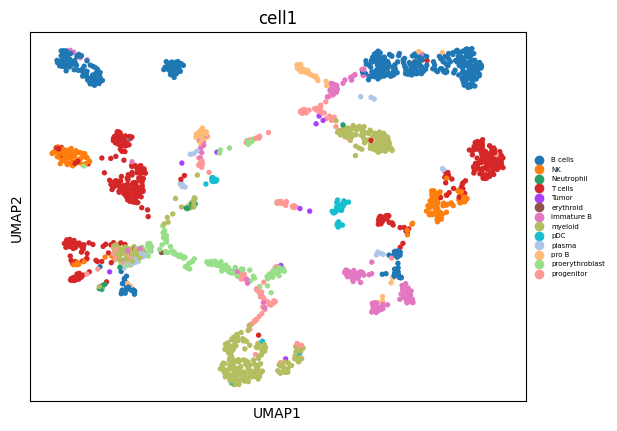

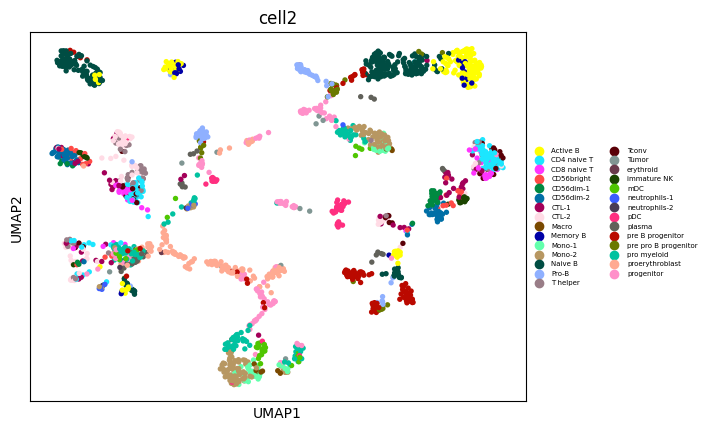

In [20]:
#plot
for feature in ["cell1", "cell2"]:
    sc.pl.umap(adata_umap, color=feature, legend_fontsize=5)

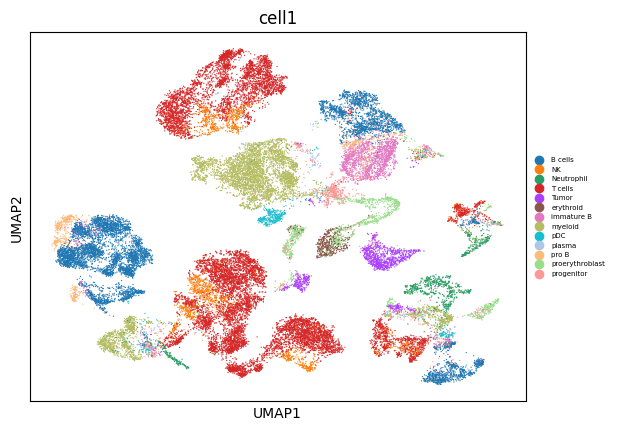

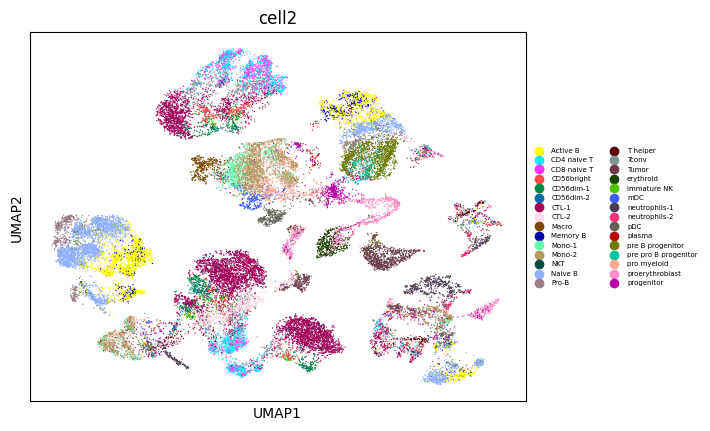

In [ ]:
#plot
for feature in ["cell1", "cell2"]:
    sc.pl.umap(adata_umap, color=feature, legend_fontsize=5)